In [40]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [38]:
IMAGE_SIZE = [224, 224]

train_path = 'F:\machine learning\kaggle\car classifications\Datasets\Train'
valid_path = 'F:\machine learning\kaggle\car classifications\Datasets\Test'

In [39]:
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [33]:
for layer in resnet.layers:
    layer.trainable = False

In [34]:
# useful for getting number of output classes
folders = glob('F:\machine learning\kaggle\car classifications\Datasets\Train*')

In [35]:

# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [36]:
prediction = Dense(4, activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [37]:

# view the structure of the model
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalizationV1) (None, 112, 112, 64) 256         conv1[0][0]                      
____________________________________________________________________________________________

In [9]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [10]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [41]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('F:\machine learning\kaggle\car classifications\Datasets\Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 174 images belonging to 4 classes.


In [12]:
test_set = test_datagen.flow_from_directory('F:\machine learning\kaggle\car classifications\Datasets\Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 66 images belonging to 4 classes.


In [13]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set))


Epoch 1/20
6/6 [==============================] - 82s 14s/step - loss: 17.8277 - accuracy: 0.2989 - val_loss: 13.4014 - val_accuracy: 0.2879
Epoch 2/20
6/6 [==============================] - 74s 12s/step - loss: 7.6929 - accuracy: 0.6322 - val_loss: 10.8900 - val_accuracy: 0.2879
Epoch 3/20
6/6 [==============================] - 71s 12s/step - loss: 3.2266 - accuracy: 0.7989 - val_loss: 19.7132 - val_accuracy: 0.2879
Epoch 4/20
6/6 [==============================] - 78s 13s/step - loss: 0.7266 - accuracy: 0.9023 - val_loss: 28.7484 - val_accuracy: 0.2879
Epoch 5/20
6/6 [==============================] - 73s 12s/step - loss: 0.3673 - accuracy: 0.9598 - val_loss: 19.5760 - val_accuracy: 0.2879
Epoch 6/20
6/6 [==============================] - 71s 12s/step - loss: 0.3350 - accuracy: 0.9655 - val_loss: 22.8561 - val_accuracy: 0.2879
Epoch 7/20
6/6 [==============================] - 70s 12s/step - loss: 0.0932 - accuracy: 0.9885 - val_loss: 19.4295 - val_accuracy: 0.2879
Epoch 8/20
6/6 [===

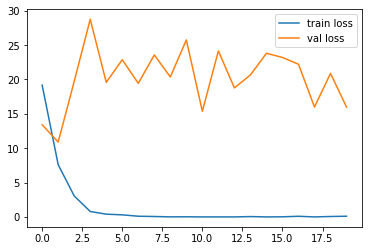

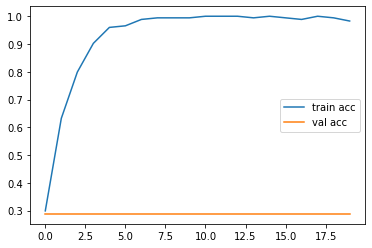

<Figure size 432x288 with 0 Axes>

In [14]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [15]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [16]:
y_pred = model.predict(test_set)

In [17]:
y_pred

array([[2.86865707e-16, 2.09980471e-11, 3.30460291e-15, 1.00000000e+00],
       [6.72613709e-17, 3.50912572e-12, 5.16325238e-16, 1.00000000e+00],
       [3.39347551e-16, 2.70060294e-11, 4.29280194e-15, 1.00000000e+00],
       [1.68098850e-16, 8.90600007e-12, 1.19821831e-15, 1.00000000e+00],
       [1.08075415e-16, 2.96413610e-12, 1.08541110e-15, 1.00000000e+00],
       [5.48383477e-16, 7.90952026e-12, 2.39668925e-15, 1.00000000e+00],
       [4.78784778e-17, 1.84903113e-12, 2.86258993e-16, 1.00000000e+00],
       [1.38637721e-16, 2.95627672e-12, 1.55556267e-15, 1.00000000e+00],
       [1.23982833e-16, 8.16335107e-12, 2.40553736e-15, 1.00000000e+00],
       [1.19942962e-16, 7.99527979e-12, 2.62085589e-15, 1.00000000e+00],
       [1.76090818e-16, 6.23106644e-12, 9.41669821e-16, 1.00000000e+00],
       [5.82681058e-16, 1.42523389e-11, 3.41958403e-15, 1.00000000e+00],
       [4.20697627e-16, 4.15106231e-12, 1.88566623e-15, 1.00000000e+00],
       [9.84683742e-17, 4.01174580e-12, 1.18754750e

In [18]:

import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [19]:
y_pred

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
      dtype=int64)

In [20]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [21]:
model=load_model('model_resnet50.h5')

In [22]:
img_data

NameError: name 'img_data' is not defined

In [23]:
img=image.load_img('F:\machine learning\kaggle\car classifications/Datasets/Test/lamborghini/11.jpg',target_size=(224,224))

In [24]:
x=image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [196., 187., 172.],
        [217., 208., 193.],
        [243., 234., 219.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 245., 237.],
        [243., 243., 235.],
        [242., 242., 234.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [240., 249., 248.],
        [242., 251., 250.],
        [242., 251., 250.]],

       ...,

       [[189., 207., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 206., 227.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 2

In [25]:
x.shape

(224, 224, 3)

In [26]:
x=x/255

In [27]:

x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [28]:
model.predict(img_data)

array([[2.9422020e-08, 6.6674934e-06, 1.6132981e-04, 9.9983191e-01]],
      dtype=float32)

In [29]:
a=np.argmax(model.predict(img_data), axis=1)

In [30]:
a==2

array([False])